[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2636094732691535167
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3665166336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3043541535296366917
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]
(300, 392)
117600
1
(610, 300, 392)
(610,)
Epoch 1/10
20/20 [==============================] - 3s 50ms/step - loss: 3.0562 - accuracy: 0.5279
Epoch 2/10
20/20 [==============================] - 1s 50ms/step - loss: 0.7161 - accuracy: 0.6656
Epoch 3/10
20/20 [==============================] - 1s 50ms/step - loss: 0.4416 - accuracy: 0.7787
Epoch 4/10
20/20 [==============================] - 1s 49ms/step - loss: 0.5244 - accuracy: 0.7574
Epoch 5/10
20/20 [==============================] - 1s 48ms/step - loss: 0.2707 - accuracy: 0.8984
Epoch 6/10
20/20 [==============================] - 1s 51ms/step - loss: 0.2727 -

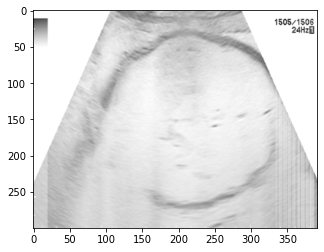

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
from tensorflow.python.client import device_lib
import numpy as np
print(device_lib.list_local_devices())


mnist = tf.keras.datasets.mnist

#(x_train,y_train), (x_test,y_test)=mnist.load_data()
#x_train = tf.keras.utils.normalize(x_train,axis=1)
#x_test= tf.keras.utils.normalize(x_test, axis=1)
X=[]
Y=[]
x_train=[]
y_train=[]
x_test=[]
y_test=[]
with open('sorted_brain_orientation.csv','r') as file:
    data = csv.reader(file)
    for row in data:
        ch="C:/Users/omarp/sonio-psc-brain/resized_images/"+row[0]
        A=plt.imread(ch)
        X.append(A)
        Y.append(int(row[1]))
X=tf.keras.utils.normalize(X,axis=1)
n=len(X)
x_train=[X[i] for i in range(9*n//10) ]
y_train=[Y[i] for i in range(9*n//10) ]

x_test=[X[i] for i in range(9*n//10,n) ]
y_test=[Y[i] for i in range(9*n//10,n) ]
print(x_train[0].shape)
print(x_train[0].shape[0]*x_train[0].shape[1])

plt.imshow(x_train[0],cmap = plt.cm.binary)
print(y_train[0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_train.shape)
print(y_train.shape)


model= tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1500, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(600, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(300, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10)


loss, accur = model.evaluate(x_test, y_test)
print(loss,accur)